In [6]:
!pip uninstall PIL
!pip install Pillow

In [114]:
import os                      as os
import numpy                   as np
import pandas                  as pd
import keras.utils             as image
import matplotlib.pyplot       as plt
from   tqdm                    import tqdm
from   PIL                     import Image
from   keras.utils             import to_categorical
from   sklearn.model_selection import train_test_split
from keras.models              import Sequential
from keras.layers              import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
%matplotlib inline

In [115]:
mpaffected_folder  = "../input/MonkeyPox/Monkey Pox/"
not_affeted_folder = "../input/MonkeyPox/Others/"
metadata           = "../input/monkeypoxmetadata/Monkeypox_Dataset_metadata.csv"

In [116]:
df = pd.read_csv(metadata)


In [117]:
monkey_pox_data = []
for i in tqdm(os.listdir(mpaffected_folder)):
    img = image.load_img(mpaffected_folder+i,target_size=(299,299,3))
    img = image.img_to_array(img)
    img = img/255
    monkey_pox_data.append([img,1])
for i in tqdm(os.listdir(not_affeted_folder)):
    img = image.load_img(not_affeted_folder+i,target_size=(299,299,3))
    img = image.img_to_array(img)
    img = img/255
    monkey_pox_data.append([img,0])

100%|██████████| 126/126 [00:00<00:00, 258.68it/s]


Text(0.5, 1.0, 'Not Affected')

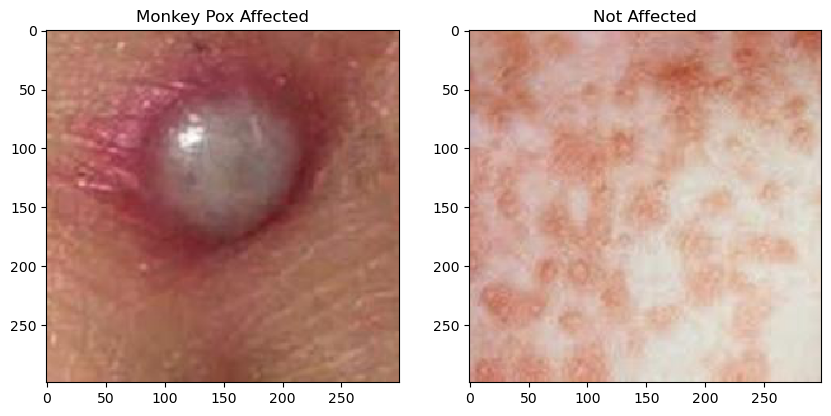

In [118]:
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 2, 1)
plt.imshow(monkey_pox_data[0][0])
plt.title("Monkey Pox Affected")
fig.add_subplot(1, 2, 2)
plt.imshow(monkey_pox_data[227][0])
plt.title("Not Affected")


In [119]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception # TensorFlow ONLY
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19

In [133]:
# Load the pre-trained Xception model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False
model = Sequential()
model.add(base_model)
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))
